In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image

%matplotlib inline

In [2]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

In [3]:
URL = r"https://www.dropbox.com/s/qhhlqcica1nvtaw/opencv_bootcamp_assets_NB1.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), f"opencv_bootcamp_assets_NB1.zip")

# Download if assest ZIP does not exists.
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)

In [4]:
# Display 18x18 pixel image.
Image(filename="checkerboard_18x18.png")

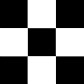

In [5]:
Image(filename="checkerboard_84x84.jpg")

In [23]:
# Read image as gray scale.
cb_img = cv2.imread("checkerboard_18x18.png",0)
#0-grayscale
#1-color
#-1-alpha chanel

# Print the image data (pixel values), element of a 2D numpy array.
# Each pixel value is 8-bits [0,255]
print(cb_img)

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

In [17]:
# print the size  of image
print("Image size (H, W) is:", cb_img.shape)

# print data-type of image
print("Data type of image is:", cb_img.dtype)

Image size (H, W) is: (18, 18)
Data type of image is: uint8


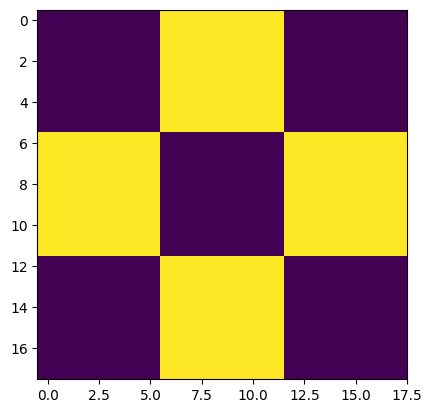

In [24]:
# Display image.
plt.imshow(cb_img)

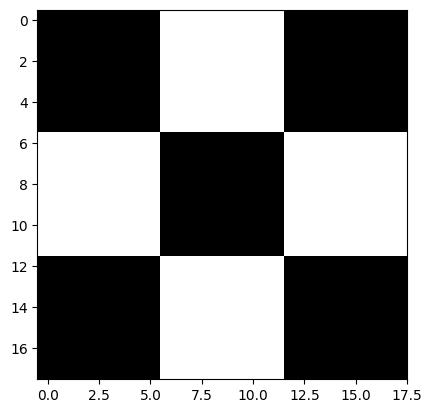

In [28]:
# Set color map to gray scale for proper rendering.
plt.imshow(cb_img ,cmap="gray")

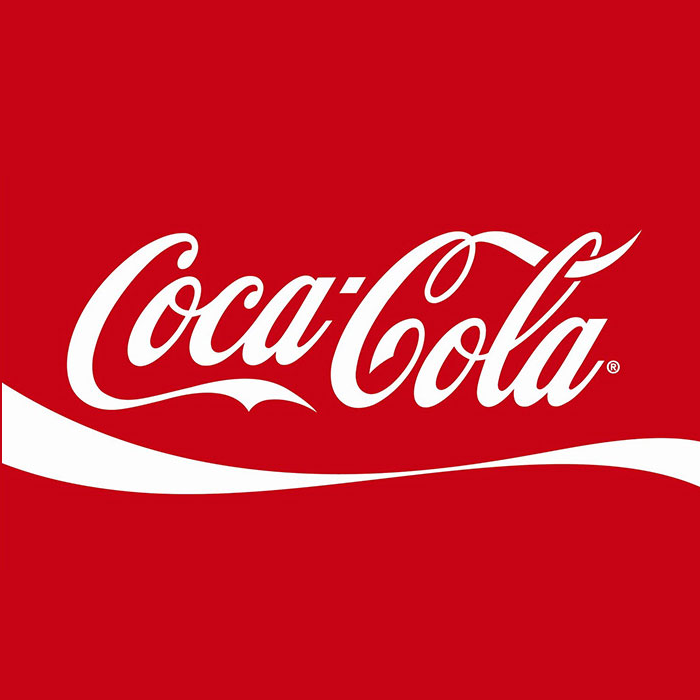

In [30]:
Image(filename="coca-cola-logo.png")

In [36]:
# Read in image
coke_img = cv2.imread("coca-cola-logo.png", 1)

# print the size  of image
print("Image size (H, W, C) is:", coke_img.shape)

# print data-type of image
print("Data type of image is:", coke_img.dtype)

Image size (H, W, C) is: (700, 700, 3)
Data type of image is: uint8


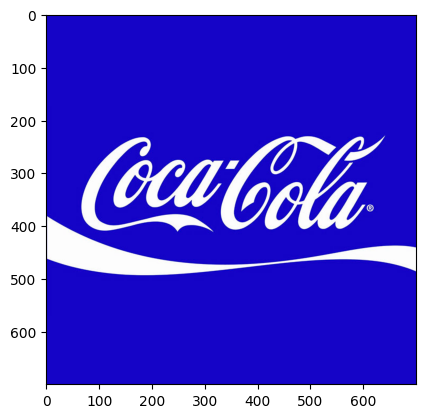

In [37]:
plt.imshow(coke_img)
#  What happened? bgr - so bluish

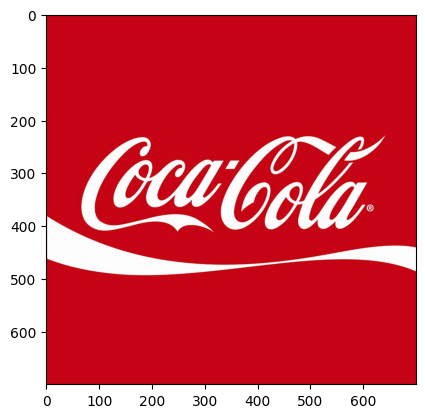

In [38]:
coke_img_channels_reversed = coke_img[:, :, ::-1]
plt.imshow(coke_img_channels_reversed)

Text(0.5, 1.0, 'Merged Output')

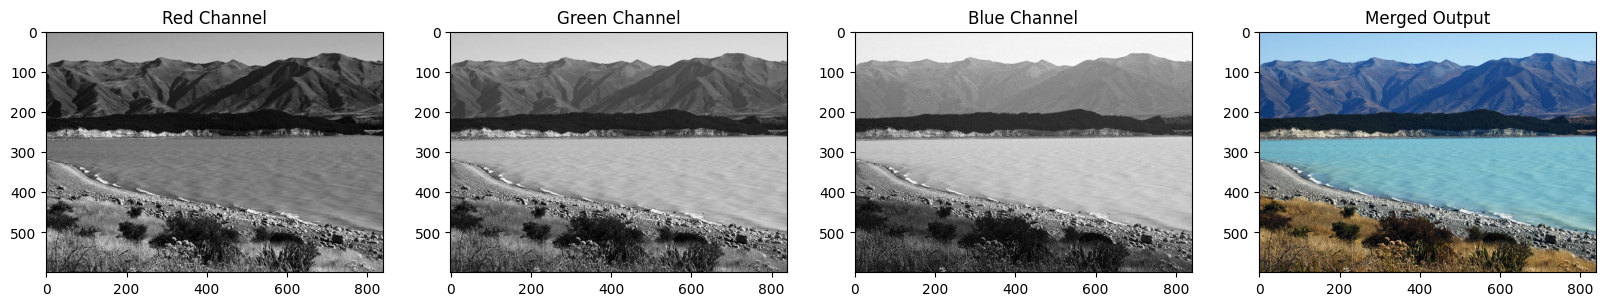

In [52]:
# Split the image into the B,G,R components
img_NZ_bgr = cv2.imread("New_Zealand_Lake.jpg", cv2.IMREAD_COLOR)
b, g, r = cv2.split(img_NZ_bgr)

# Show the channels
plt.figure(figsize=[20, 5])

plt.subplot(141);plt.imshow(r, cmap="gray");plt.title("Red Channel")
plt.subplot(142);plt.imshow(g, cmap="gray");plt.title("Green Channel")
plt.subplot(143);plt.imshow(b, cmap="gray");plt.title("Blue Channel")

# Merge the individual channels into a BGR image
imgMerged = cv2.merge((b,g,r))
# Show the merged output
plt.subplot(144)
plt.imshow(imgMerged[:, :, ::-1])
plt.title("Merged Output")

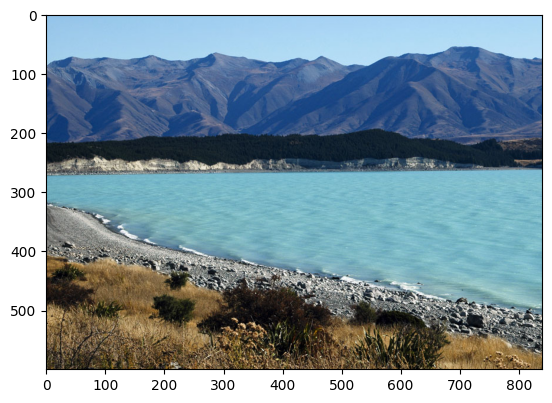

In [53]:
img_NZ_rgb = cv2.cvtColor(img_NZ_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_NZ_rgb)

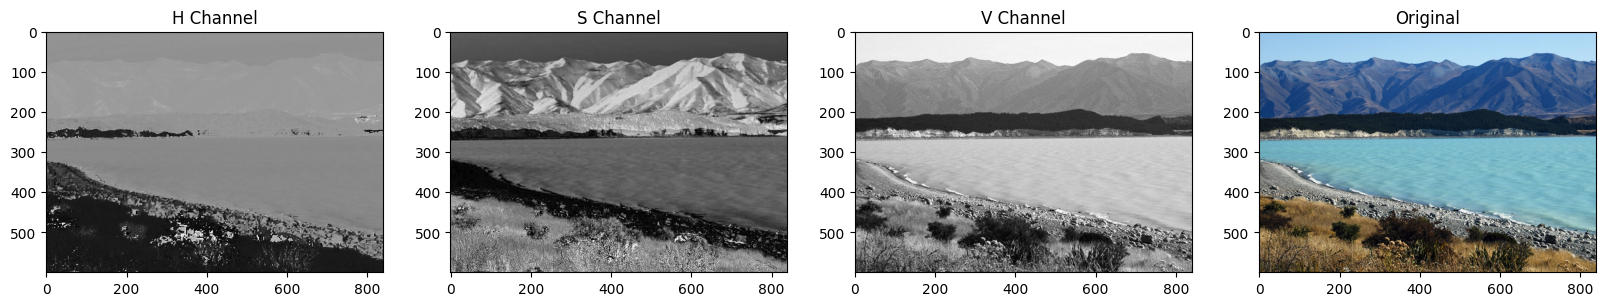

In [44]:
img_hsv = cv2.cvtColor(img_NZ_bgr, cv2.COLOR_BGR2HSV)

# Split the image into the B,G,R components
h,s,v = cv2.split(img_hsv)

# Show the channels
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(h, cmap="gray");plt.title("H Channel");
plt.subplot(142);plt.imshow(s, cmap="gray");plt.title("S Channel");
plt.subplot(143);plt.imshow(v, cmap="gray");plt.title("V Channel");
plt.subplot(144);plt.imshow(img_NZ_rgb);   plt.title("Original");

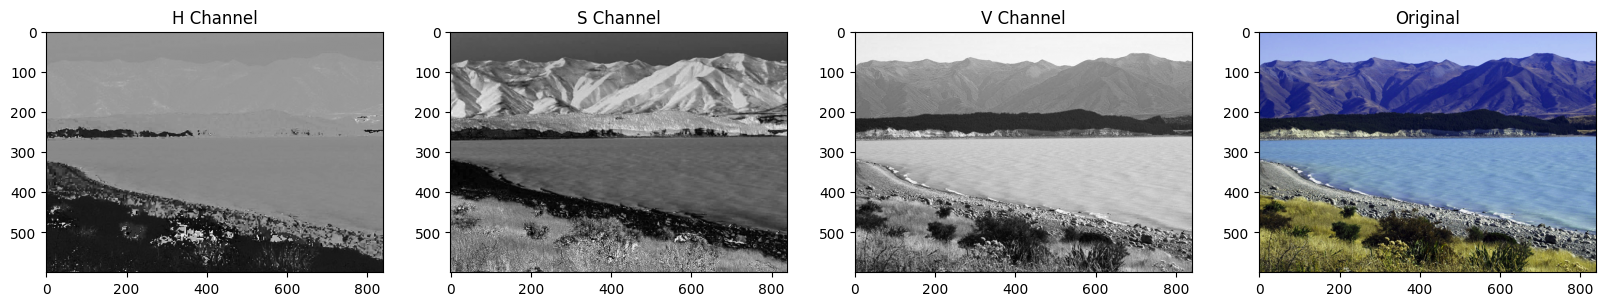

In [45]:
h_new = h + 10
img_NZ_merged = cv2.merge((h_new, s, v))
img_NZ_rgb = cv2.cvtColor(img_NZ_merged, cv2.COLOR_HSV2RGB)

# Show the channels
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(h, cmap="gray");plt.title("H Channel");
plt.subplot(142);plt.imshow(s, cmap="gray");plt.title("S Channel");
plt.subplot(143);plt.imshow(v, cmap="gray");plt.title("V Channel");
plt.subplot(144);plt.imshow(img_NZ_rgb);   plt.title("Original");

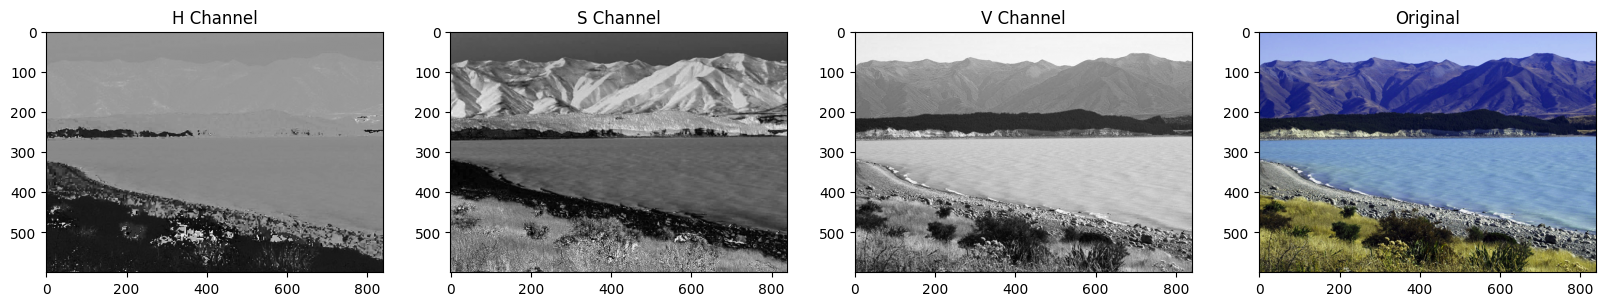

In [48]:
h_new = h + 10
img_NZ_merged = cv2.merge((h_new, s, v))
img_NZ_rgb = cv2.cvtColor(img_NZ_merged, cv2.COLOR_HSV2RGB)

# Show the channels
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(h, cmap="gray");plt.title("H Channel");
plt.subplot(142);plt.imshow(s, cmap="gray");plt.title("S Channel");
plt.subplot(143);plt.imshow(v, cmap="gray");plt.title("V Channel");
plt.subplot(144);plt.imshow(img_NZ_rgb);   plt.title("Original");

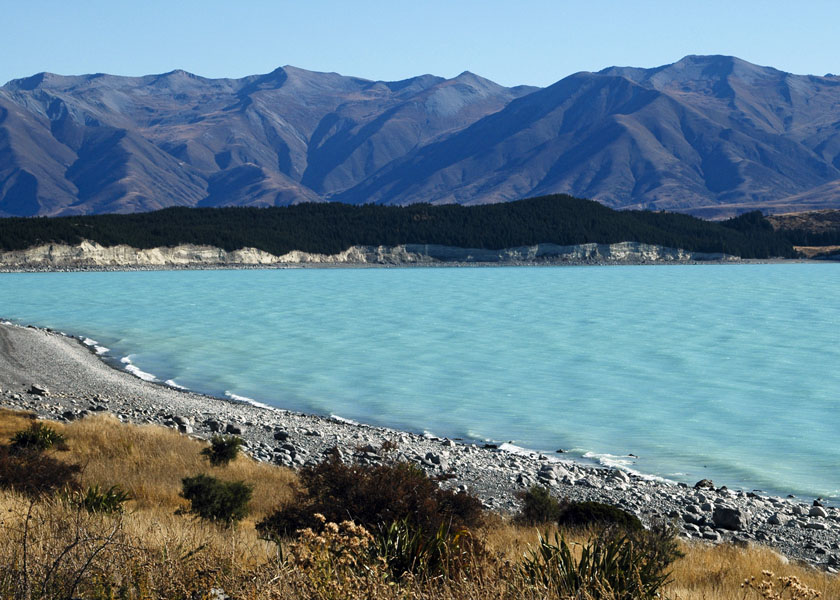

In [55]:
cv2.imwrite("New_Zealand_Lake_SAVED.png", img_NZ_bgr)
Image(filename='New_Zealand_Lake_SAVED.png')

In [56]:
img_NZ_bgr = cv2.imread("New_Zealand_Lake_SAVED.png", cv2.IMREAD_COLOR)
print("img_NZ_bgr shape (H, W, C) is:", img_NZ_bgr.shape)

# read the image as Grayscaled
img_NZ_gry = cv2.imread("New_Zealand_Lake_SAVED.png", cv2.IMREAD_GRAYSCALE)
print("img_NZ_gry shape (H, W) is:", img_NZ_gry.shape)

img_NZ_bgr shape (H, W, C) is: (600, 840, 3)
img_NZ_gry shape (H, W) is: (600, 840)
